In [1]:
!pip install ipywidgets widgetsnbextension pandas-profiling
!jupyter nbextension enable --py widgetsnbextension

import ipywidgets

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [65]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [67]:
input_size = 784
hidden_size = 100  # num of neurons in hidden layer
num_classes = 10   #labels
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [68]:
#MNIST
train_dataset = datasets.MNIST(root='./mnist_dataset', train=True, transform=transforms.ToTensor(), download=True)
test_dataset  = datasets.MNIST(root='./mnist_dataset', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [69]:
examples = iter(train_loader)

samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


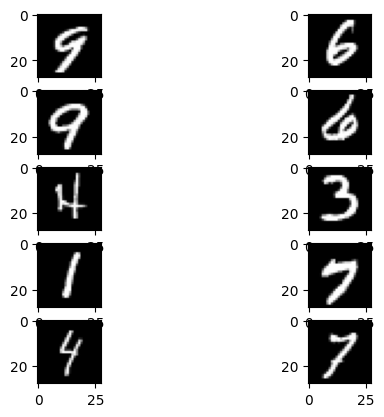

In [70]:
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [71]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.l2(out)
        return out

In [72]:
#model
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # to(device) to keep the tensors in the activated device (cuda in this case)
#loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [73]:
# training loop
n_total_steps = len(train_loader)
print(n_total_steps)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad() # to empty the gradient attribute from the last forward prop
        loss.backward()       # backward prop
        optimizer.step()      # update parameters in each step
        
        if (i+1)%100 == 0:
            print('epoch ', (epoch+1), '/', num_epochs, 'step ', ((i+1)/n_total_steps), 'loss = ', '%.4f' % loss.item())
        
        

600
epoch  1 / 2 step  0.16666666666666666 loss =  0.5351
epoch  1 / 2 step  0.3333333333333333 loss =  0.3965
epoch  1 / 2 step  0.5 loss =  0.3536
epoch  1 / 2 step  0.6666666666666666 loss =  0.2777
epoch  1 / 2 step  0.8333333333333334 loss =  0.1922
epoch  1 / 2 step  1.0 loss =  0.1666
epoch  2 / 2 step  0.16666666666666666 loss =  0.2520
epoch  2 / 2 step  0.3333333333333333 loss =  0.2736
epoch  2 / 2 step  0.5 loss =  0.2333
epoch  2 / 2 step  0.6666666666666666 loss =  0.3217
epoch  2 / 2 step  0.8333333333333334 loss =  0.1904
epoch  2 / 2 step  1.0 loss =  0.1298


In [88]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # values, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct/n_samples
    
    print('accuracy = ', acc)
        

accuracy =  94.47
